In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt

from datetime import date, timedelta

import jax.numpy as jnp

import mechafil.data as mecha_data
import mechafil.sim as np_sim
import mechafil_jax.data as data
import mechafil_jax.sim as sim
import mechafil_jax.constants as C

In [13]:
token = '/Users/kiran/code/filecoin-mecha-twin/kiran_spacescope_auth.json'

start_date = date(2023, 6, 1)
current_date = date.today() - timedelta(days=3)
forecast_length = 365*5
end_date = current_date + timedelta(days=forecast_length)

offline_data = data.get_simulation_data(token, start_date, current_date, end_date)

print(start_date, current_date, end_date)

2023-06-01 2023-06-20 2028-06-18


In [5]:
rbp_val = 6
rr_val = 0.6
fpr_val = 0.6
lock_target = 0.3
sector_duration=360

In [6]:
# run numpy simulation
np_df = np_sim.run_simple_sim(
    start_date,
    current_date,
    forecast_length,
    rr_val,
    rbp_val,
    fpr_val,
    sector_duration,
    token
)

In [15]:
# run JAX simulation
rbp = jnp.ones(forecast_length) * rbp_val
rr = jnp.ones(forecast_length) * rr_val
fpr = jnp.ones(forecast_length) * fpr_val

simulation_results = sim.run_sim(
    rbp,
    rr,
    fpr,
    lock_target,
    
    start_date,
    current_date,
    forecast_length,
    sector_duration,
    offline_data
)

total_sim_len = (end_date - start_date).days
t = [start_date + timedelta(days=i) for i in range(total_sim_len)]

<IPython.core.display.Javascript object>


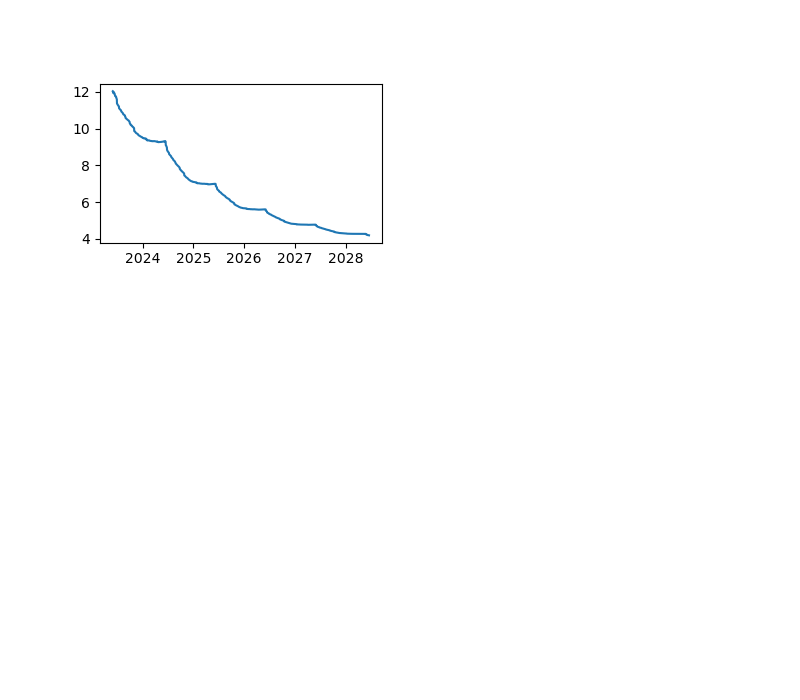

NameError: name 't' is not defined

In [12]:
plt.figure(figsize=(8,7))

plt.subplot(3,2,1)
plt.plot(np_df['date'], np_df['network_RBP']/C.EXBI, label='NP')
plt.plot(t, simulation_results['rb_total_power_eib'], label='JAX', linestyle=':')
plt.xticks(rotation=60)
plt.ylabel('EiB')
plt.title('RBP')
plt.legend()

plt.subplot(3,2,2)
plt.plot(np_df['date'], np_df['network_QAP']/C.EXBI, label='NP')
plt.plot(t, simulation_results['qa_total_power_eib'], label='JAX', linestyle=':')
plt.xticks(rotation=60)
plt.ylabel('EiB')
plt.title('QAP')

plt.subplot(3,2,3)
plt.plot(np_df['date'], np_df['day_network_reward'], label='NP')
plt.plot(t, simulation_results['day_network_reward'], label='JAX', linestyle=':')
plt.xticks(rotation=60)
plt.title('Minting Rate')
plt.ylabel('FIL/day')

plt.subplot(3,2,4)
plt.plot(np_df['date'], np_df['network_locked']/1e6, label='NP')
plt.plot(t, simulation_results['network_locked']/1e6, label='JAX', linestyle=':')
plt.xticks(rotation=60)
plt.title('Network Locked')
plt.ylabel('M-FIL')

plt.subplot(3,2,5)
plt.plot(np_df['date'], np_df['circ_supply']/1e6, label='NP')
plt.plot(t, simulation_results['circ_supply']/1e6, label='JAX', linestyle=':')
plt.xticks(rotation=60)
plt.title('Circulating Supply')
plt.ylabel('M-FIL')

plt.tight_layout()

In [ ]:
jnp.arange(10,15).astype(jnp.float32)